In [ ]:
!wget "https://github.com/Thegreatesthumphrey/Prediction-Model-for-Total-Body-Fat-in-Adult-Men/raw/master/Bodyfat.csv"

--2022-08-07 06:56:38--  https://github.com/Thegreatesthumphrey/Prediction-Model-for-Total-Body-Fat-in-Adult-Men/raw/master/Bodyfat.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Thegreatesthumphrey/Prediction-Model-for-Total-Body-Fat-in-Adult-Men/master/Bodyfat.csv [following]
--2022-08-07 06:56:38--  https://raw.githubusercontent.com/Thegreatesthumphrey/Prediction-Model-for-Total-Body-Fat-in-Adult-Men/master/Bodyfat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18916 (18K) [text/plain]
Saving to: ‘Bodyfat.csv’

Bodyfat.csv         100%[===================>]  18.47K  --.-KB/s    in 0

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.regularizers import l1, l2
from tabulate import tabulate

In [ ]:
df = pd.read_csv("Bodyfat.csv")
df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [ ]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)

In [ ]:
cols = df.columns
i = 0
for col in cols:
    if col != "bodyfat":
      df[col] = scalled[:,i]
      i += 1

In [ ]:
df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,12.3,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432
1,0.792801,6.1,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345
2,0.407375,25.3,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158
3,0.703248,10.4,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317
4,0.342406,28.7,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.690079,11.0,0.231579,0.813559,0.064378,0.777202,0.189055,0.173989,0.180432,0.060606,0.059850,0.111801,0.162162,0.039604,0.338129
248,0.251097,33.6,0.707368,0.847458,0.337216,0.834197,0.487562,0.513181,0.452351,0.311005,0.309227,0.484472,0.277027,0.514851,0.546763
249,0.331870,29.3,0.616842,0.847458,0.278970,0.756477,0.388060,0.558875,0.534943,0.266348,0.326683,0.267081,0.162162,0.321782,0.446043
250,0.394205,26.0,0.547368,0.847458,0.295320,0.849741,0.388060,0.509666,0.405337,0.204147,0.219451,0.534161,0.243243,0.282178,0.604317


In [ ]:
y = df.pop("bodyfat")
x = df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
x_train.shape

(214, 14)

In [ ]:
x_test.shape

(38, 14)

In [ ]:
y_train.shape

(214,)

In [ ]:
lr = [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]

In [ ]:
dic1 = {}
dic1['layers'] = 0
dic1['epoch'] = 0
dic1['act'] = ''
dic1['lr'] = 0
dic1['reg'] = ''
dic1['rmse'] = [999999.9]
dic1['val_rmse'] = [999999.9]
dic1['loss'] = [999999.9]
dic1['val_loss'] = [999999.9]

dic2 = {}
dic2['layers'] = 0
dic2['epoch'] = 0
dic2['act'] = ''
dic2['lr'] = 0
dic2['reg'] = ''
dic2['rmse'] = [999999.9]
dic2['val_rmse'] = [999999.9]
dic2['loss'] = [999999.9]
dic2['val_loss'] = [999999.9]

dic3 = {}
dic3['layers'] = 0
dic3['epoch'] = 0
dic3['act'] = ''
dic3['lr'] = 0
dic3['reg'] = ''
dic3['rmse'] = [999999.9]
dic3['val_rmse'] = [999999.9]
dic3['loss'] = [999999.9]
dic3['val_loss'] = [999999.9]

In [ ]:
i = 1
for ep in range (10,50,10):
  for act in ['relu', 'sigmoid']:
    for lear in lr:
      for l in [None, l1(0.01), l2(0.01)]:
        model = keras.Sequential([
        keras.layers.InputLayer(input_shape = 14, name = "InputLayer"),
        keras.layers.Dense(128, activation=act, activity_regularizer=l, name = "hiddenlayer1"),
        keras.layers.Dense(1, activation=act, activity_regularizer=l, name = "outputlayer")
        ])
        opt = tf.keras.optimizers.Adam(learning_rate=lear)
        model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[RootMeanSquaredError(name='rmse')])
        history = model.fit(x_train, y_train, epochs=ep, validation_split=0.1275, batch_size=4)

        if history.history['rmse'][-1] < dic1['rmse'][-1]:
          dic1['layers'] = i
          dic1['epoch'] = ep
          dic1['act'] = act
          dic1['lr'] = lear
          dic1['reg'] = l
          dic1['rmse'] = history.history['rmse']
          dic1['val_rmse'] = history.history['val_rmse']
          dic1['loss'] = history.history['loss']
          dic1['val_loss'] = history.history['val_rmse']

In [ ]:
i = 2
for ep in range (10,50,10):
  for act in ['relu', 'sigmoid']:
    for lear in lr:
      for l in [l1(0.01), l2(0.01)]:
        model = keras.Sequential([
        keras.layers.InputLayer(input_shape = 14, name = "InputLayer"),
        keras.layers.Dense(128, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer1"),
        keras.layers.Dense(64, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer2"),
        keras.layers.Dense(1, activation=act, activity_regularizer=l1(0.01), name = "outputlayer")
        ])
        opt = tf.keras.optimizers.Adam(learning_rate=lear)
        model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[RootMeanSquaredError(name='rmse')])
        history = model.fit(x_train, y_train, epochs=ep, validation_split=0.1275, batch_size=4)

        if history.history['rmse'][-1] < dic2['rmse'][-1]:
          dic2['layers'] = i
          dic2['epoch'] = ep
          dic2['act'] = act
          dic2['lr'] = lear
          dic2['reg'] = l
          dic2['rmse'] = history.history['rmse']
          dic2['val_rmse'] = history.history['val_rmse']
          dic2['loss'] = history.history['loss']
          dic2['val_loss'] = history.history['val_rmse']

In [ ]:
i = 3
for ep in range (10,50,10):
  for act in ['relu', 'sigmoid']:
    for lear in lr:
      for l in [l1(0.01), l2(0.01)]:
        model = keras.Sequential([
        keras.layers.InputLayer(input_shape = 14, name = "InputLayer"),
        keras.layers.Dense(128, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer1"),
        keras.layers.Dense(64, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer2"),
        keras.layers.Dense(32, activation=act, activity_regularizer=l1(0.01), name = "hiddenlayer3"),
        keras.layers.Dense(1, activation=act, activity_regularizer=l1(0.01), name = "outputlayer")
        ])
        opt = tf.keras.optimizers.Adam(learning_rate=lear)
        model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[RootMeanSquaredError(name='rmse')])
        history = model.fit(x_train, y_train, epochs=ep, validation_split=0.1275, batch_size=4)

        if history.history['rmse'][-1] < dic3['rmse'][-1]:
          dic3['layers'] = i
          dic3['epoch'] = ep
          dic3['act'] = act
          dic3['lr'] = lear
          dic3['reg'] = l
          dic3['rmse'] = history.history['rmse']
          dic3['val_rmse'] = history.history['val_rmse']
          dic3['loss'] = history.history['loss']
          dic3['val_loss'] = history.history['val_rmse']

In [ ]:
print("Optimal hyperparameters are:")
table = [['Layers', 'Learning Rate', 'Epochs', 'Activation', 'Regularization', 'RMSE', 'Loss'],
         [dic1['layers'], dic1['lr'], dic1['epoch'], dic1['act'], str(dic1['reg'])[20:22], dic1['rmse'][-1], dic1['loss'][-1]],
         [dic2['layers'], dic2['lr'], dic2['epoch'], dic2['act'], str(dic2['reg'])[20:22], dic2['rmse'][-1], dic2['loss'][-1]],
         [dic3['layers'], dic3['lr'], dic3['epoch'], dic3['act'], str(dic3['reg'])[20:22], dic3['rmse'][-1], dic3['loss'][-1]]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Optimal hyperparameters are:
╒══════════╤═════════════════╤══════════╤══════════════╤══════════════════╤══════════╤══════════╕
│   Layers │   Learning Rate │   Epochs │ Activation   │ Regularization   │     RMSE │     Loss │
╞══════════╪═════════════════╪══════════╪══════════════╪══════════════════╪══════════╪══════════╡
│        1 │            0.1  │       20 │ relu         │ L1               │ 0.352158 │ 0.48893  │
├──────────┼─────────────────┼──────────┼──────────────┼──────────────────┼──────────┼──────────┤
│        2 │            0.01 │       30 │ relu         │ L1               │ 0.271512 │ 0.88161  │
├──────────┼─────────────────┼──────────┼──────────────┼──────────────────┼──────────┼──────────┤
│        3 │            0.01 │       40 │ relu         │ L2               │ 0.277113 │ 0.898336 │
╘══════════╧═════════════════╧══════════╧══════════════╧══════════════════╧══════════╧══════════╛


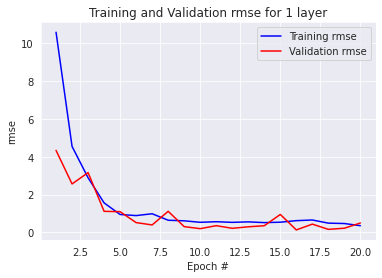

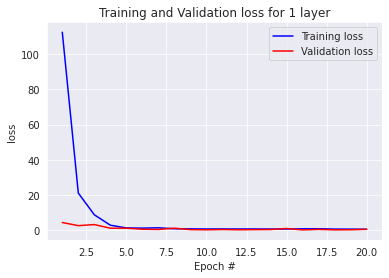

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = dic1['rmse']
val_rmse = dic1['val_rmse']
loss = dic1['loss']
val_loss = dic1['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.xlabel('Epoch #')
plt.ylabel('rmse')
plt.title('Training and Validation rmse for 1 layer')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for 1 layer')
plt.legend()

plt.show()

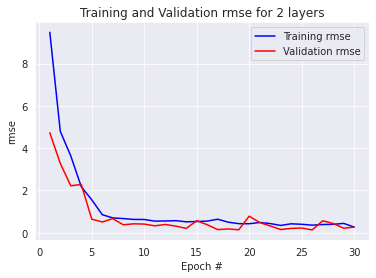

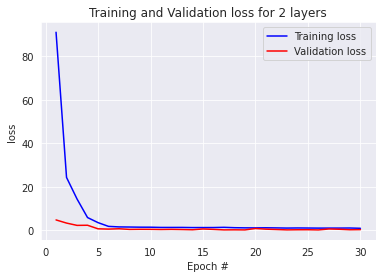

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = dic2['rmse']
val_rmse = dic2['val_rmse']
loss = dic2['loss']
val_loss = dic2['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.xlabel('Epoch #')
plt.ylabel('rmse')
plt.title('Training and Validation rmse for 2 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for 2 layers')
plt.legend()

plt.show()

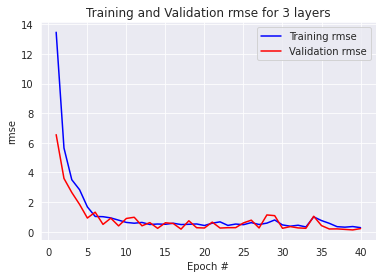

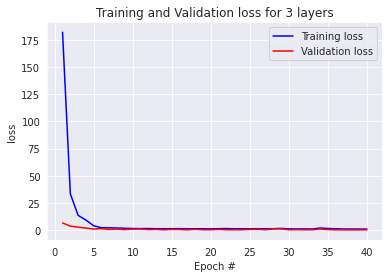

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = dic3['rmse']
val_rmse = dic3['val_rmse']
loss = dic3['loss']
val_loss = dic3['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.xlabel('Epoch #')
plt.ylabel('rmse')
plt.title('Training and Validation rmse for 3 layers')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss for 3 layers')
plt.legend()

plt.show()